# **Aprendizaje supervisado**
# SL15. Tarea Final

A continuación se entregan una serie de datasets. Para cada uno de ellos construya TRES (3) modelos de aprendizaje supervisado y compare sus resultados.

## <font color='blue'>**Set de Datos Boston Housing**</font>

El objetivo es poder predecir a nivel de negocio, el valor promedio de una propiedad en miles de dólares (US$1000) en la ciudad de Boston y que corresponde a la variable **MEDV**.

Informacion de los atributos   
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per \$10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    \% lower status of the population
14. MEDV     Median value of owner-occupied homes in \$1000's (target)

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [ ]:
#Lee un archivo CSV directamente de una URL y guarda los resultados
url='https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
names=['CRIM','ZN','INDUS','CHAS','NOS','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df = pd.read_csv(url,delimiter='\s+', header=None, names=names)
#data = pd.read_csv(url,delim_whitespace=True, header = None)

# Muestra las 5 primeras filas
df.head()

,CRIM,ZN,INDUS,CHAS,NOS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


1. Realice 3 visualizaciones con los datos.

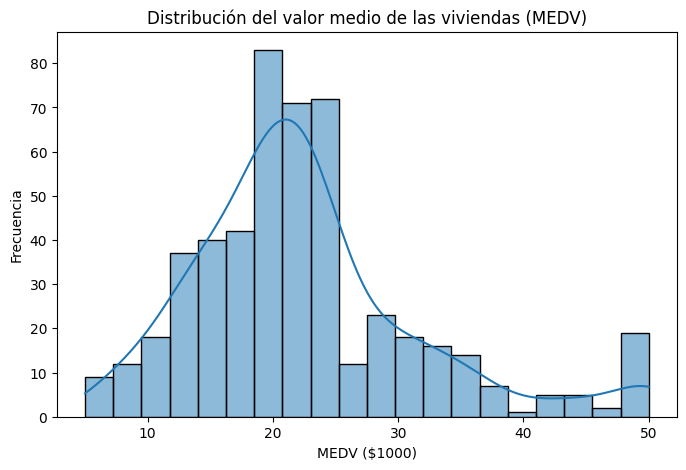

In [ ]:
# Histograma del valor medio de las viviendas
plt.figure(figsize=(8,5))
sns.histplot(df['MEDV'], kde=True, bins=20)
plt.title('Distribución del valor medio de las viviendas (MEDV)')
plt.xlabel('MEDV ($1000)')
plt.ylabel('Frecuencia')
plt.show()

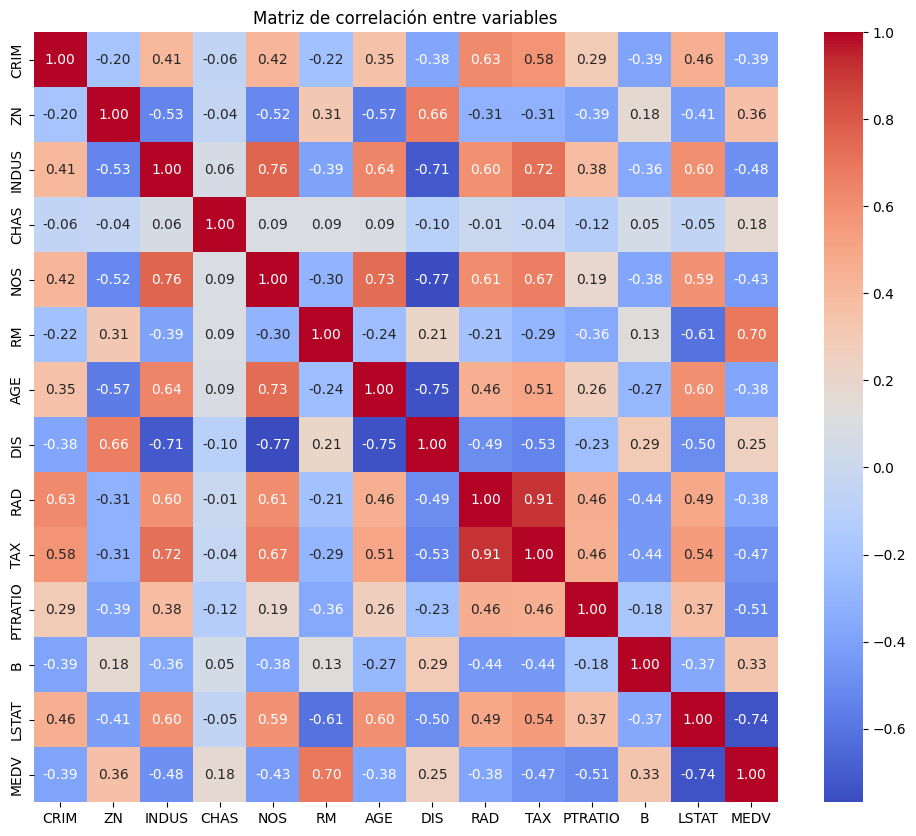

In [ ]:
# Mapa de calor de correlaciones
plt.figure(figsize=(12,10))
correlaciones = df.corr()
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables')
plt.show()

<Figure size 800x600 with 0 Axes>

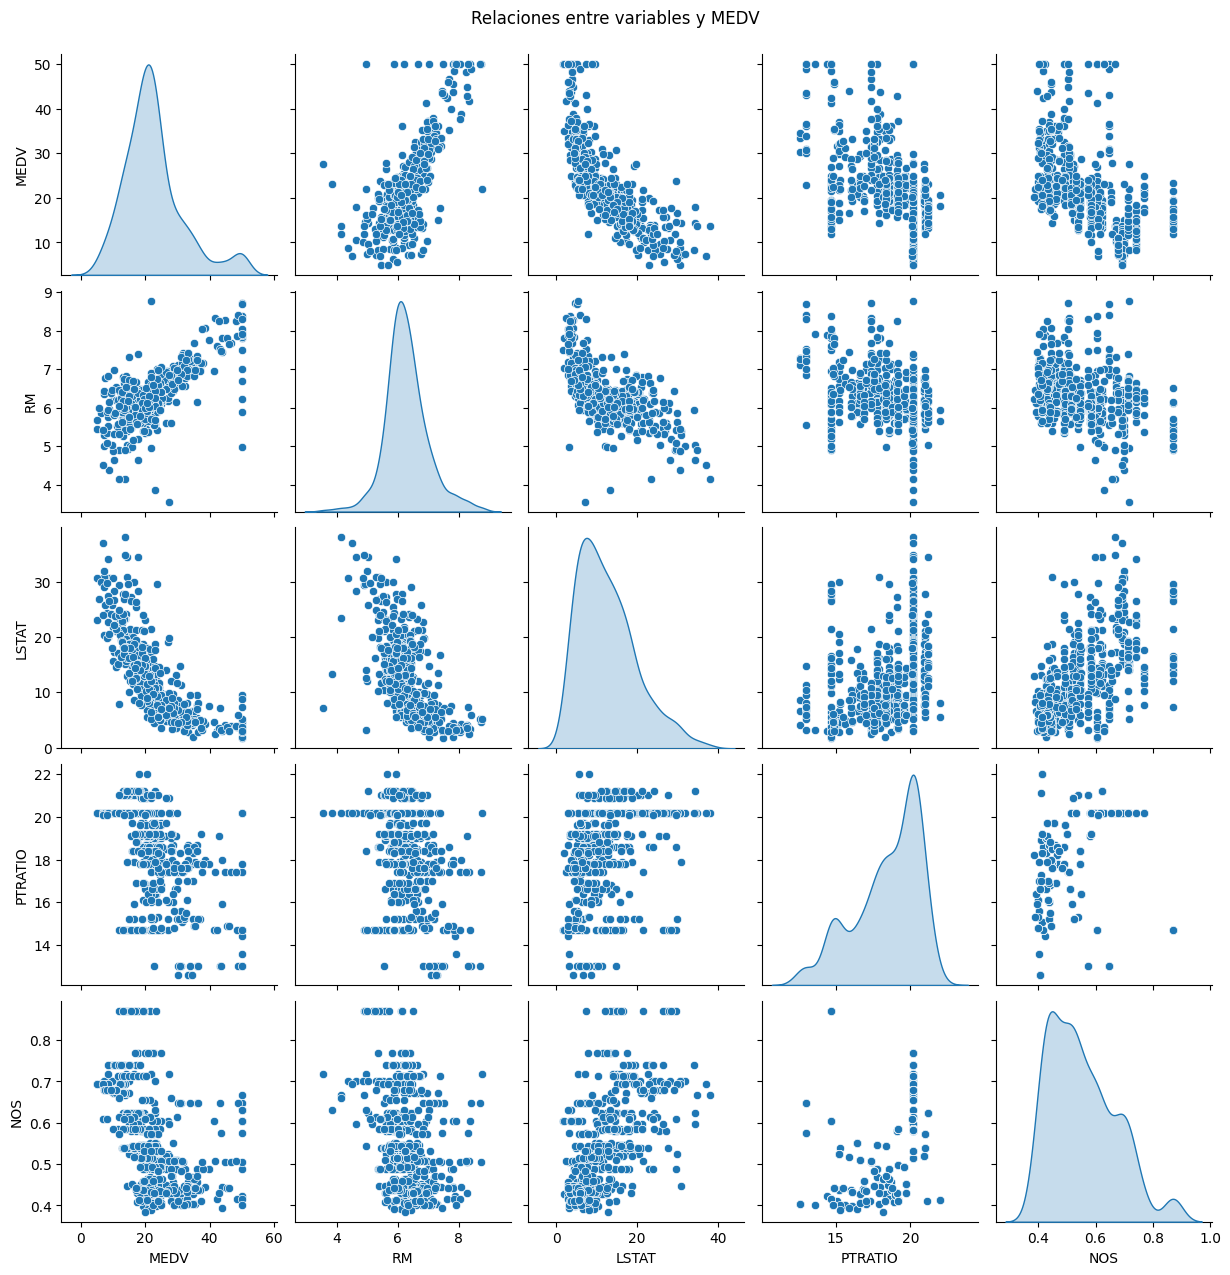

In [ ]:
# Pairplot con las variables más correlacionadas con el precio
plt.figure(figsize=(8,6))
sns.pairplot(df[['MEDV', 'RM', 'LSTAT', 'PTRATIO', 'NOS']], diag_kind='kde')
plt.suptitle('Relaciones entre variables y MEDV', y=1.02)
plt.show()

2. Pruebe todos los modelos disponibles para el problema de regresión. Reporte el MAE, MSE, RMSE y VarScore.

In [ ]:
# Vamos a probar 3 modelos: Regresión Lineal, Árbol de Decisión, Random Forest

# Dividimos el data set en X e y
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Normalizamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividimos entre train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definimos los modelos
modelos = {
    'Regresión Lineal': LinearRegression(),
    'Árbol de Decisión': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

In [ ]:
# Entrenamos los modelos

resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    pred = modelo.predict(X_test)

    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)

    resultados.append({
        'Modelo': nombre,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2
    })

df_resultados = pd.DataFrame(resultados)
df_resultados.sort_values(by='RMSE')

,Modelo,MAE,MSE,RMSE,R2 Score
2,Random Forest,2.039539,7.901514,2.810963,0.892253
1,Árbol de Decisión,2.394118,10.416078,3.227395,0.857963
0,Regresión Lineal,3.189092,24.291119,4.928602,0.668759


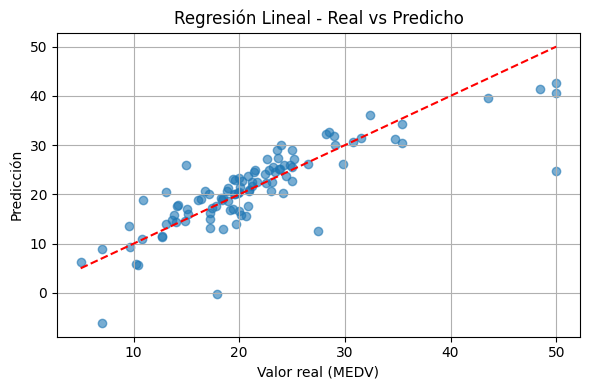

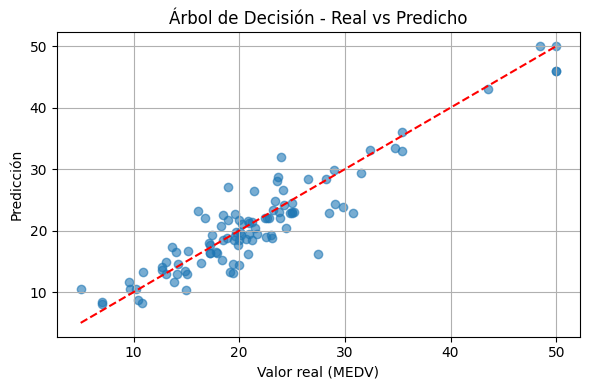

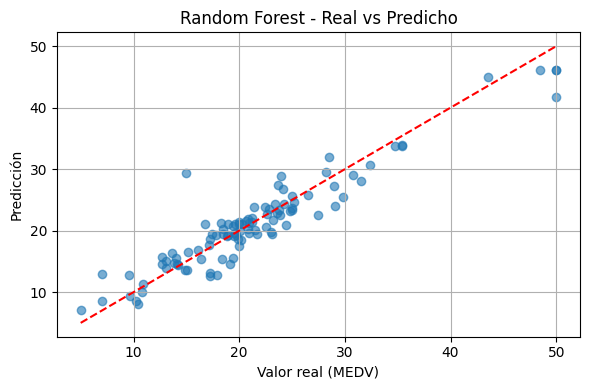

In [ ]:
# Visualizamos las predicciones versus los valores reales

for nombre, modelo in modelos.items():
    pred = modelo.predict(X_test)

    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f'{nombre} - Real vs Predicho')
    plt.xlabel('Valor real (MEDV)')
    plt.ylabel('Predicción')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

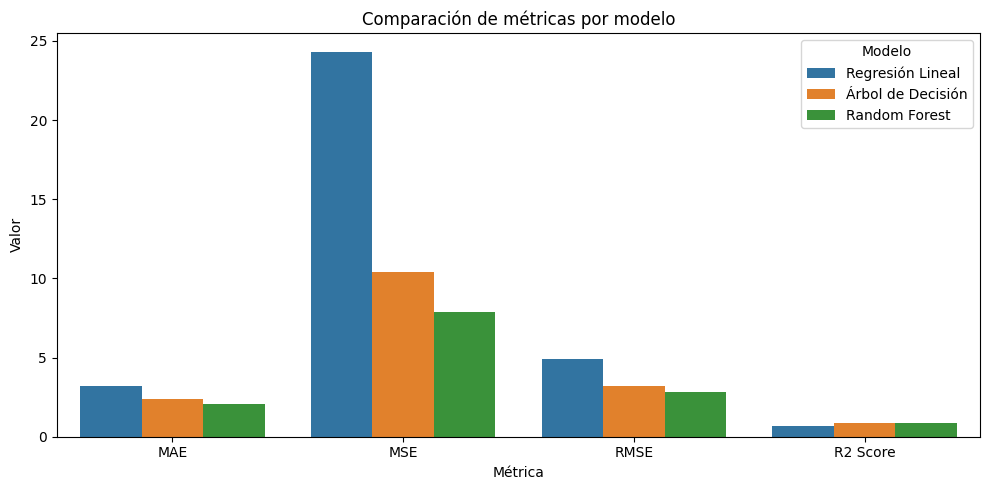

In [ ]:
# Visualizamos gráficamente las métricas

# Preparamos los datos en formato largo (melt)
df_melt = df_resultados.melt(id_vars='Modelo', value_vars=['MAE', 'MSE', 'RMSE', 'R2 Score'],
                             var_name='Métrica', value_name='Valor')

# Gráfico de barras agrupado
plt.figure(figsize=(10,5))
sns.barplot(data=df_melt, x='Métrica', y='Valor', hue='Modelo')
plt.title('Comparación de métricas por modelo')
plt.ylabel('Valor')
plt.xlabel('Métrica')
plt.legend(title='Modelo')
plt.tight_layout()
plt.show()

### **Conclusión Preliminar:**

Se observa que para todas las métricas el modelo Random Forest tuvo mejor desempeño.

### **Siguiente paso:**

Ajustar hiperparámetros de Árbol de Decisión y Random Forest con GridSearchCV.

In [ ]:
# Árbol
param_grid_tree = {
    'max_depth': [3, 5, 10, 20, 40, None],
    'min_samples_split': [2, 5, 10]
}

grid_tree = GridSearchCV(DecisionTreeRegressor(random_state=42),
                         param_grid=param_grid_tree,
                         scoring='neg_mean_squared_error',
                         cv=5)

grid_tree.fit(X_train, y_train)
mejor_arbol = grid_tree.best_estimator_
print("Mejor Árbol:", grid_tree.best_params_)

Mejor Árbol: {'max_depth': 20, 'min_samples_split': 2}


In [ ]:
# Random Forest
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, 20, 40, None]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42),
                       param_grid=param_grid_rf,
                       scoring='neg_mean_squared_error',
                       cv=5)

grid_rf.fit(X_train, y_train)
mejor_rf = grid_rf.best_estimator_
print("Mejor Random Forest:", grid_rf.best_params_)

Mejor Random Forest: {'max_depth': 40, 'n_estimators': 100}


In [ ]:
modelos_opt = {
    'Regresión Lineal': LinearRegression(),
    'Árbol Optimizado': mejor_arbol,
    'Random Forest Optimizado': mejor_rf
}

resultados_opt = []

for nombre, modelo in modelos_opt.items():
    modelo.fit(X_train, y_train)
    pred = modelo.predict(X_test)

    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)

    resultados_opt.append({
        'Modelo': nombre,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'VarScore': r2
    })

df_resultados_opt = pd.DataFrame(resultados_opt)

pd.concat([df_resultados.set_index('Modelo'), df_resultados_opt.set_index('Modelo')],
          axis=1, keys=['Base', 'Optimizado'])

Base                                Optimizado  \
                               MAE        MSE      RMSE  R2 Score        MAE   
Modelo                                                                         
Regresión Lineal          3.189092  24.291119  4.928602  0.668759   3.189092   
Árbol de Decisión         2.394118  10.416078  3.227395  0.857963        NaN   
Random Forest             2.039539   7.901514  2.810963  0.892253        NaN   
Árbol Optimizado               NaN        NaN       NaN       NaN   2.394118   
Random Forest Optimizado       NaN        NaN       NaN       NaN   2.039539   

                                                         
                                MSE      RMSE  VarScore  
Modelo                                                   
Regresión Lineal          24.291119  4.928602  0.668759  
Árbol de Decisión               NaN       NaN       NaN  
Random Forest                   NaN       NaN       NaN  
Árbol Optimizado          10.416078  3.227395  0.857963  
Random Forest Optimizado   7.901514  2.810963  0.892253

Revisaremos la importancia de las variables para el modelo Random Forest. Esto nos indica qué variables ayudan más al modelo a explicar el precio de vivienda.

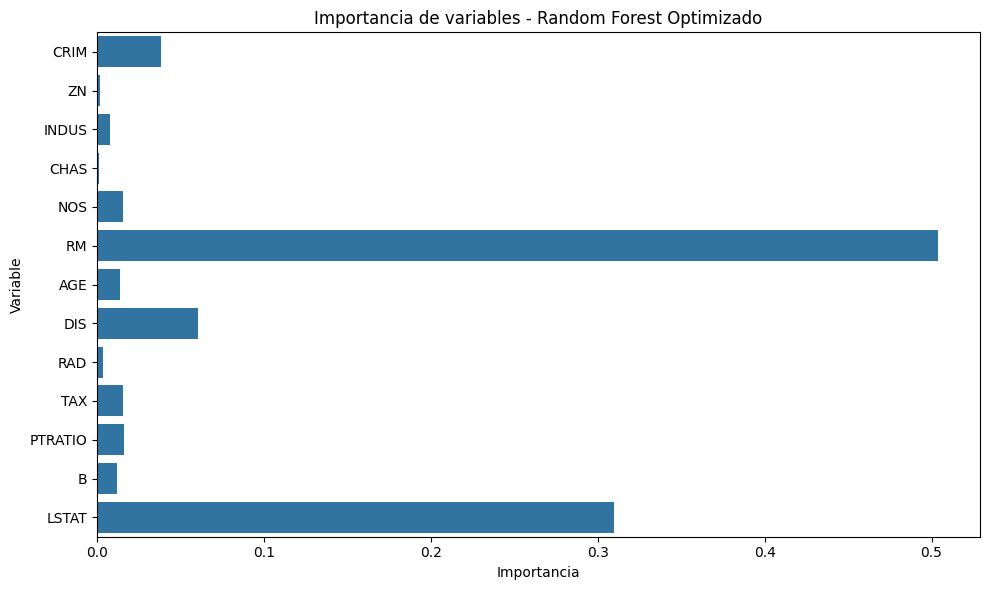

In [ ]:
importancias = mejor_rf.feature_importances_
features = df.drop('MEDV', axis=1).columns

plt.figure(figsize=(10,6))
sns.barplot(x=importancias, y=features)
plt.title('Importancia de variables - Random Forest Optimizado')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

Por último, revisaremos como se comportan los residuos para los distintos modelos.

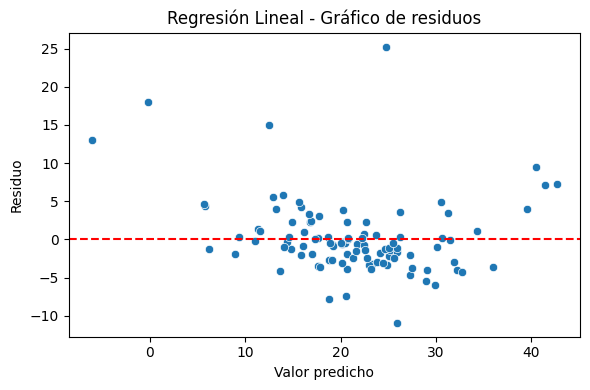

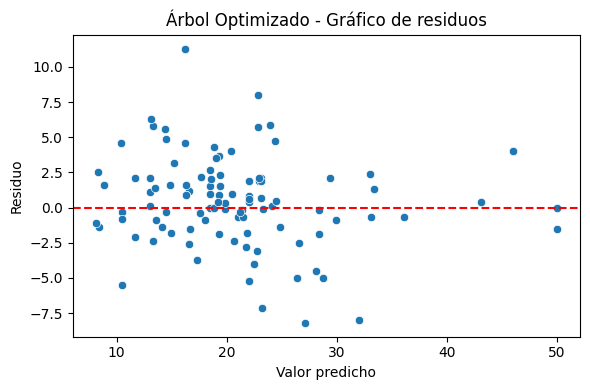

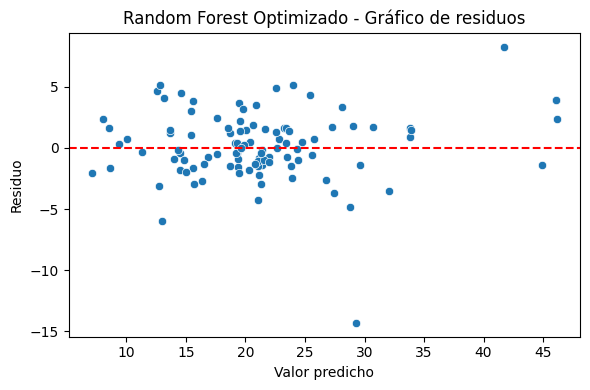

In [ ]:
for nombre, modelo in modelos_opt.items():
    y_pred = modelo.predict(X_test)
    residuales = y_test - y_pred

    plt.figure(figsize=(6,4))
    sns.scatterplot(x=y_pred, y=residuales)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'{nombre} - Gráfico de residuos')
    plt.xlabel('Valor predicho')
    plt.ylabel('Residuo')
    plt.tight_layout()
    plt.show()

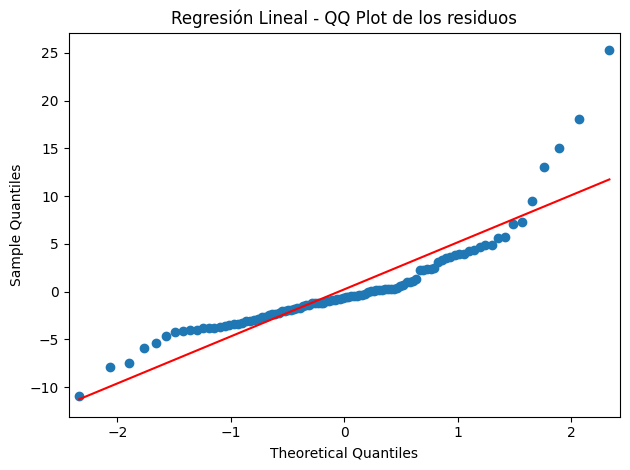

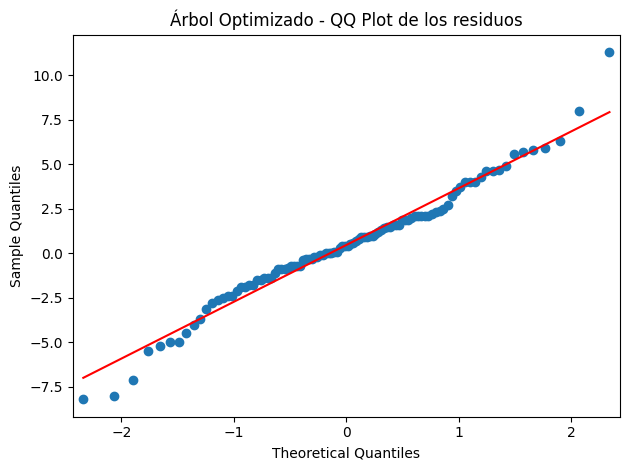

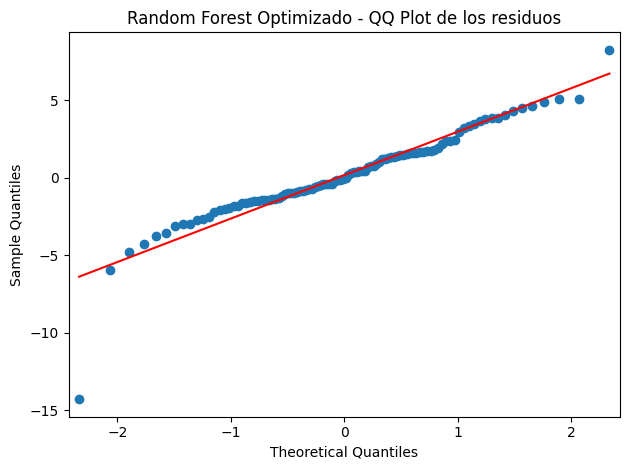

In [ ]:
import statsmodels.api as sm

for nombre, modelo in modelos_opt.items():
    y_pred = modelo.predict(X_test)
    residuales = y_test - y_pred

    sm.qqplot(residuales, line='s')
    plt.title(f'{nombre} - QQ Plot de los residuos')
    plt.tight_layout()
    plt.show()

### **Conclusión**

El modelo de Random Forest es el que presenta mejor desempeño entre los tres modelos probados. Sin embargo, al optimizar sus hiperparámetros con GridSearchCV, no se observa una mejora significativa en sus métricas respecto al modelo base.

Por otra parte, al analizar la importancia de las variables, se observa que las que más aportan a la predicción del modelo son:

- RM: número promedio de habitaciones por vivienda

- LSTAT: % de población con menor nivel socioeconómico

- DIS: distancia ponderada a centros de empleo

- CRIM: tasa de criminalidad per cápita

Si revisamos la matriz de correlación lineal construida al inicio, confirmamos que RM y LSTAT efectivamente son las variables con mayor correlación con el precio de las viviendas. En cambio, DIS y CRIM, aunque relevantes para el modelo, tienen una correlación lineal baja con el precio, lo que sugiere que Random Forest es capaz de capturar relaciones no lineales que la regresión lineal no detecta.

Por último, al analizar los residuos del modelo, vemos que estos se distribuyen aleatoriamente alrededor de cero y siguen aproximadamente una distribución normal. Esto indica que el modelo no presenta sesgos evidentes y que el error se comporta de manera esperada.

## <font color='blue'>**Set de Datos Fake News**</font>

Inspiración
¿Se puede usar este dataset para generar un algoritmo que identifique "fake news" y "real news"?

https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

**Referencias**

*   Ahmed H, Traore I, Saad S. “Detecting opinion spams and fake news using text classification”, Journal of Security and Privacy, Volume 1, Issue 1, Wiley, January/February 2018.
*   Ahmed H, Traore I, Saad S. (2017) “Detection of Online Fake News Using N-Gram Analysis and Machine Learning Techniques. In: Traore I., Woungang I., Awad A. (eds) Intelligent, Secure, and Dependable Systems in Distributed and Cloud Environments. ISDDC 2017. Lecture Notes in Computer Science, vol 10618. Springer, Cham (pp. 127-138).






Revise los datos que se encuentran en el archivo **Dataset_fakenews.zip**. Realice un analisis descriptivo de los datos, genere las transformaciones necesarias para preparar su dataset para algoritmos de clasificacion y pruebe con todos los modelos de clasificacion revisados en clases. Optimice los parametros de su algoritmo y reporte el F1-score de 20 corridas experimentales con 5 fold cross validation.

Explique sus decisiones, genere visualizaciones y conclusiones.

In [ ]:
# Paquetes y funciones
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
import warnings
warnings.filterwarnings('ignore')

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Solución

# Montamos Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Leemos los data sets
ruta_true = '/content/drive/MyDrive/Ciencia de Datos UDD/Aprendizaje Supervisado/True.csv'
ruta_fake = '/content/drive/MyDrive/Ciencia de Datos UDD/Aprendizaje Supervisado/Fake.csv'
df_true = pd.read_csv(ruta_true)
df_fake = pd.read_csv(ruta_fake)
df_true.head()
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


### Preprocesamiento de los datos: Genere las transformaciones necesarias para preparar su dataset para algoritmos de clasificacion

In [ ]:
# Unión de datasets
df_true['label'] = 0  # REAL
df_fake['label'] = 1  # FAKE

# Unimos ambos datasets
df = pd.concat([df_true, df_fake]).reset_index(drop=True)

In [ ]:
# Limpieza de texto y título
# Función para eliminar stopwords y dejar solo palabras relevantes
def limpiar_texto(texto):
    texto = str(texto).lower()
    tokens = re.findall(r'\b\w+\b', texto)
    tokens_filtrados = [t for t in tokens if t not in stop_words]
    return ' '.join(tokens_filtrados)

# Aplicamos la limpieza a texto y título
df['text_clean'] = df['text'].astype(str).apply(limpiar_texto)
df['title_clean'] = df['title'].astype(str).apply(limpiar_texto)

In [ ]:
# Agregamos cantidad de palabras como variable
df['text_length'] = df['text'].astype(str).apply(lambda x: len(x.split()))
df['title_length'] = df['title'].astype(str).apply(lambda x: len(x.split()))

In [ ]:
# Convertimos la columna 'date' a tipo datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extraemos año, mes y día de la semana
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.dayofweek

In [ ]:
# Convertimos la variable categórica 'subject' en variables binarias
df = pd.get_dummies(df, columns=['subject'], drop_first=True)

Vectorizaremos las palabras que más se repiten en título y texto, sin considerar conectores ni palabras que se repiten en más del 30% de los textos o títulos.

In [ ]:
# Eliminamos lista de palabras que podrían estar 100% relacionadas con label
palabras_prohibidas = [
    'reuters', 'donald', 'russia', 'republican', 'republicans', 'hillary', 'white',
    'trump', 'obama', 'video', 'fake', 'true', 'says', 'house', 'senate', 'president',
    'tweets', 'campaign', 'media', 'election'
]

def limpiar_texto(texto):
    texto = str(texto).lower()
    tokens = re.findall(r'\b\w+\b', texto)
    tokens_filtrados = [
        t for t in tokens
        if t not in stop_words and t not in palabras_prohibidas
    ]
    return ' '.join(tokens_filtrados)

# Aplicamos la limpieza a texto y título
df['text_clean'] = df['text'].astype(str).apply(limpiar_texto)
df['title_clean'] = df['title'].astype(str).apply(limpiar_texto)


In [ ]:
# Vectorizamos texto limpio (limitada a 50 features cada una))
vectorizador_text = TfidfVectorizer(stop_words='english', max_df=0.3, min_df=30, max_features=100)
vectorizador_title = TfidfVectorizer(stop_words='english', max_df=0.3, min_df=30, max_features=100)

X_text = vectorizador_text.fit_transform(df['text_clean'])
X_title = vectorizador_title.fit_transform(df['title_clean'])

Vamos a revisar las palabra que se agregaron en la vectorización


In [ ]:
# Sumamos los valores TF-IDF por palabra en todas las filas (documentos)
suma_tfidf_text = X_text.sum(axis=0)

# Creamos un DataFrame con las palabras y sus pesos
palabras_text = vectorizador_text.get_feature_names_out()
tfidf_total_text = pd.DataFrame({
    'palabra': palabras_text,
    'peso': np.asarray(suma_tfidf_text).flatten()
})

# Ordenamos de mayor a menor
tfidf_total_text = tfidf_total_text.sort_values(by='peso', ascending=False)

# Mostramos las más importantes
print(len(tfidf_total_text))
print(tfidf_total_text.head(10))

100
       palabra         peso
14     clinton  2772.735189
32  government  2559.869670
54        news  2273.648280
79      states  2266.880280
86      united  2140.734647
61       party  2112.397275
91  washington  1991.199126
85     twitter  1958.766670
63      police  1907.704527
18     country  1859.662868


In [ ]:
# Hacemos lo mismo para el título
suma_tfidf_title = X_title.sum(axis=0)

palabras_title = vectorizador_title.get_feature_names_out()
tfidf_total_title = pd.DataFrame({
    'palabra': palabras_title,
    'peso': np.asarray(suma_tfidf_title).flatten()
})

tfidf_total_title = tfidf_total_title.sort_values(by='peso', ascending=False)

print(len(tfidf_total_title))
print(tfidf_total_title.head(10))

100
     palabra         peso
95     watch  1309.366202
14   clinton  1272.000921
50       new  1189.632015
79     state   810.337341
17     court   664.192973
92      vote   636.060902
9   breaking   621.006027
51      news   617.181544
11     calls   606.494895
13     china   603.585817


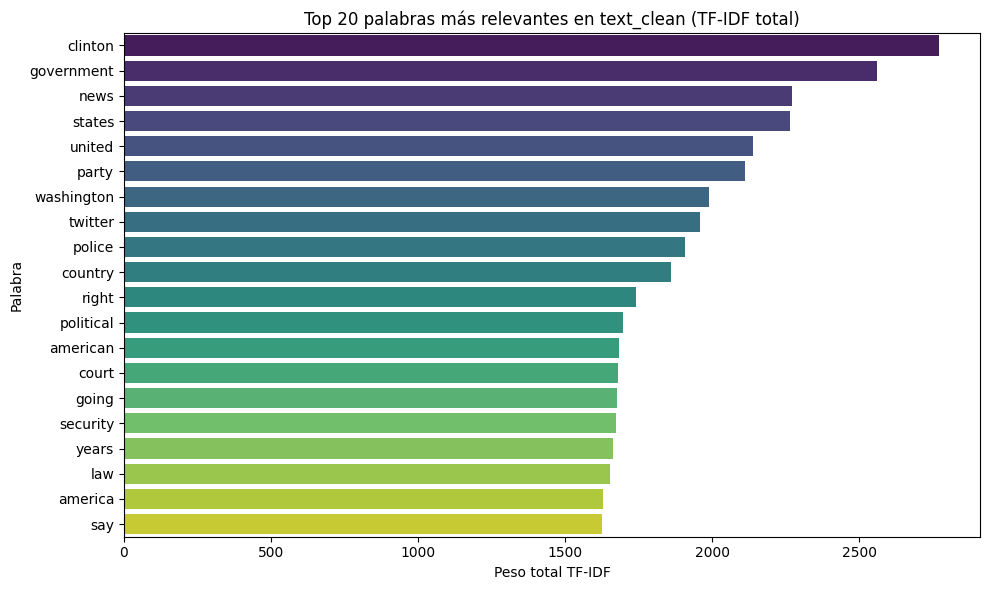

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para TEXT
suma_tfidf_text = X_text.sum(axis=0)
palabras_text = vectorizador_text.get_feature_names_out()
tfidf_total_text = pd.DataFrame({
    'palabra': palabras_text,
    'peso': np.asarray(suma_tfidf_text).flatten()
}).sort_values(by='peso', ascending=False).head(20)

# Barplot
plt.figure(figsize=(10,6))
sns.barplot(data=tfidf_total_text, x='peso', y='palabra', palette='viridis')
plt.title('Top 20 palabras más relevantes en text_clean (TF-IDF total)')
plt.xlabel('Peso total TF-IDF')
plt.ylabel('Palabra')
plt.tight_layout()
plt.show()

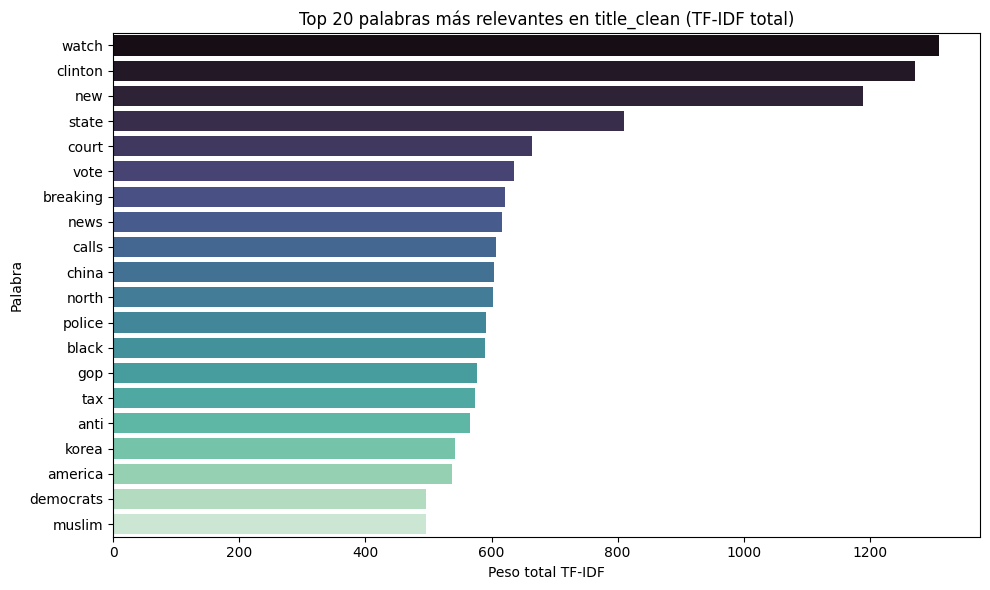

In [ ]:
# Para TITLE
suma_tfidf_title = X_title.sum(axis=0)
palabras_title = vectorizador_title.get_feature_names_out()
tfidf_total_title = pd.DataFrame({
    'palabra': palabras_title,
    'peso': np.asarray(suma_tfidf_title).flatten()
}).sort_values(by='peso', ascending=False).head(20)

# Barplot
plt.figure(figsize=(10,6))
sns.barplot(data=tfidf_total_title, x='peso', y='palabra', palette='mako')
plt.title('Top 20 palabras más relevantes en title_clean (TF-IDF total)')
plt.xlabel('Peso total TF-IDF')
plt.ylabel('Palabra')
plt.tight_layout()
plt.show()

In [ ]:
# Seleccionamos todas las columnas numéricas adicionales
X_struct = df.drop(columns=['text', 'title', 'text_clean', 'title_clean', 'date', 'label'])

# Aseguramos que todas las columnas sean numéricas y sin nulos
X_struct = X_struct.fillna(0).astype(float)

Al intentar hacer los modelos notamos que no da 100% accuracy en todos los valores. Revisamos las correlaciones de nuestras columnas con label y notamos que "year" tiene una correlación perfecta con label. Además "month" y weekday también se correlaciona fuertemente. Por esto, eliminamos estas variables.

In [ ]:
# Calculamos correlaciones
X_struct_check = X_struct.copy()
X_struct_check['label'] = y

correlaciones = X_struct_check.corr(numeric_only=True)['label'].sort_values(ascending=False)
print(correlaciones)

label                   1.000000
title_length            0.580489
subject_News            0.479858
subject_politics        0.404915
subject_left-news       0.317132
subject_US_News         0.127236
subject_Middle-east     0.126822
text_length             0.053405
subject_worldnews      -0.565730
subject_politicsNews   -0.606236
weekday                -0.727004
Name: label, dtype: float64


In [ ]:
# Eliminamos year
X_struct = X_struct.drop(columns=['year', 'month','weekday'])

In [ ]:
# Unión final y train/test split

from sklearn.model_selection import train_test_split

# Unimos texto + título + variables estructuradas
X = hstack([X_text, X_title, X_struct.values])
y = df['label']

# División para entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Forma de X:", X.shape)
print(type(X))

Forma de X: (44898, 209)
<class 'scipy.sparse._coo.coo_matrix'>


### Realice un analisis descriptivo de los datos

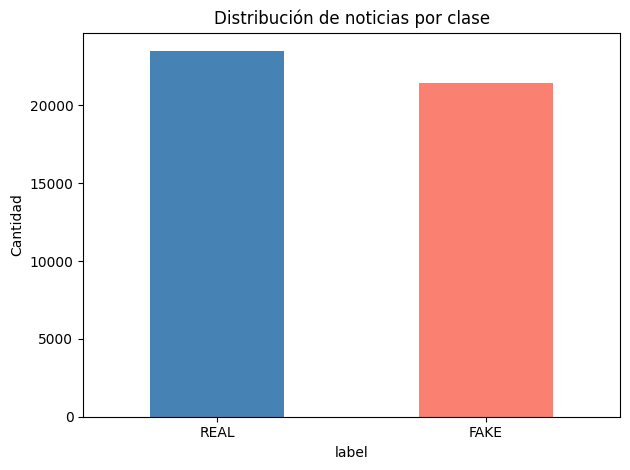

Porcentaje de noticias:
label
FAKE    52.298543
REAL    47.701457
Name: proportion, dtype: float64


In [ ]:
#¿Cuántas noticias reales y falsas hay?

# Conteo simple
df['label'].value_counts().plot(kind='bar', color=['steelblue', 'salmon'])
plt.title('Distribución de noticias por clase')
plt.xticks(ticks=[0,1], labels=['REAL', 'FAKE'], rotation=0)
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

# Porcentaje
porcentajes = df['label'].value_counts(normalize=True) * 100
print("Porcentaje de noticias:")
print(porcentajes.rename({0: 'REAL', 1: 'FAKE'}))

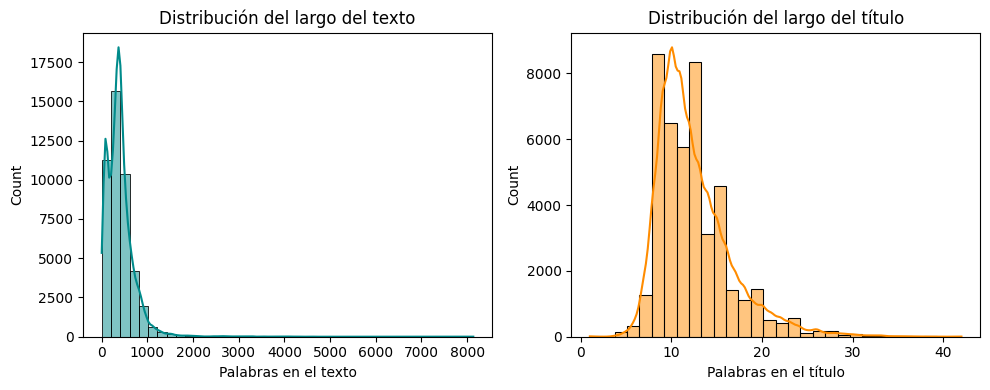

In [ ]:
# Largo del texto y del título

plt.figure(figsize=(10,4))

# Largo del texto
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='text_length', bins=40, kde=True, color='darkcyan')
plt.title('Distribución del largo del texto')
plt.xlabel('Palabras en el texto')

# Largo del título
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='title_length', bins=30, kde=True, color='darkorange')
plt.title('Distribución del largo del título')
plt.xlabel('Palabras en el título')

plt.tight_layout()
plt.show()

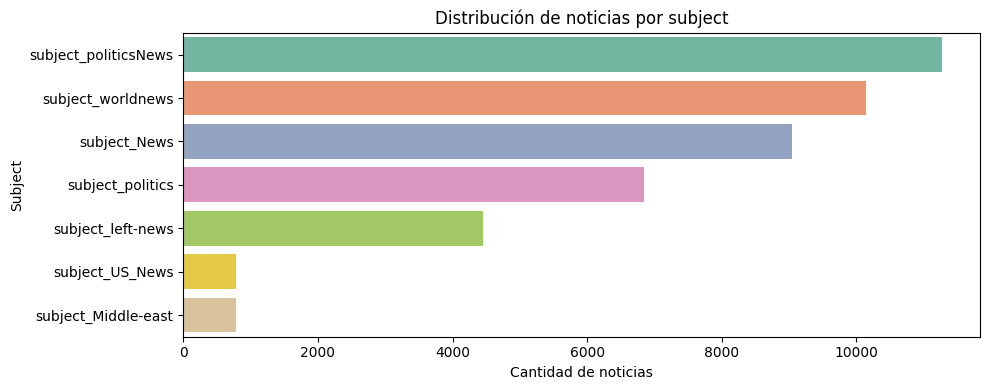

In [ ]:
# Distribución por subject

# Contar cuántas noticias hay por subject
subjects = df[[col for col in df.columns if col.startswith('subject_')]]
subjects_sum = subjects.sum().sort_values(ascending=False)

plt.figure(figsize=(10,4))
sns.barplot(x=subjects_sum.values, y=subjects_sum.index, palette='Set2')
plt.title('Distribución de noticias por subject')
plt.xlabel('Cantidad de noticias')
plt.ylabel('Subject')
plt.tight_layout()
plt.show()

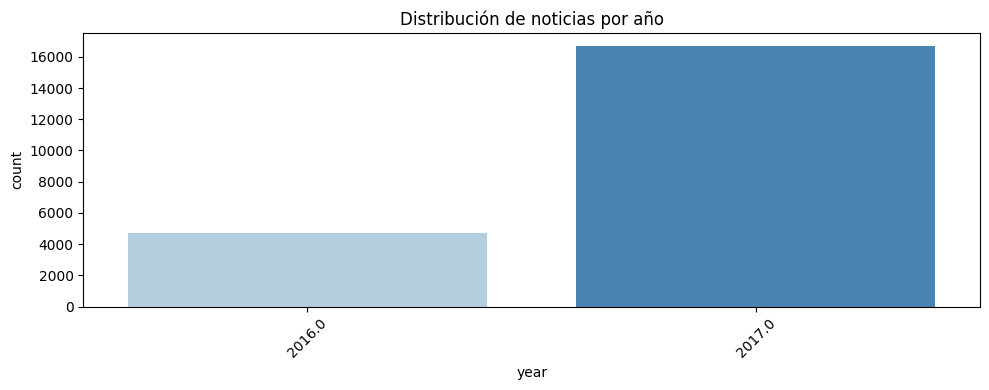

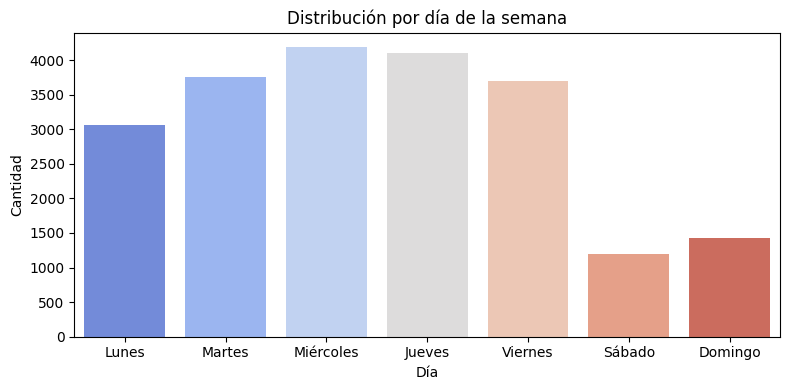

In [ ]:
# Distribución temporal (año y día de la semana)

# Año
plt.figure(figsize=(10,4))
sns.countplot(x='year', data=df, palette='Blues')
plt.title('Distribución de noticias por año')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Día de la semana
dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
df['weekday_name'] = df['weekday'].map(dict(zip(range(7), dias)))

plt.figure(figsize=(8,4))
sns.countplot(x='weekday_name', data=df, order=dias, palette='coolwarm')
plt.title('Distribución por día de la semana')
plt.xlabel('Día')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

### Pruebe con todos los modelos de clasificacion revisados en clases.

Modelos a usar:
- Regresión Logística
- Naive Bayes
- Random Forest






----- Regresión Logística -----
              precision    recall  f1-score   support

        REAL       1.00      1.00      1.00      4330
        FAKE       1.00      1.00      1.00      4650

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



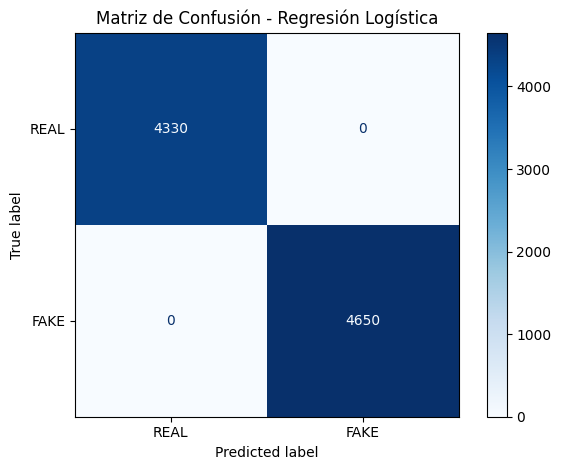


----- Naive Bayes -----
              precision    recall  f1-score   support

        REAL       0.97      1.00      0.98      4330
        FAKE       1.00      0.97      0.98      4650

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



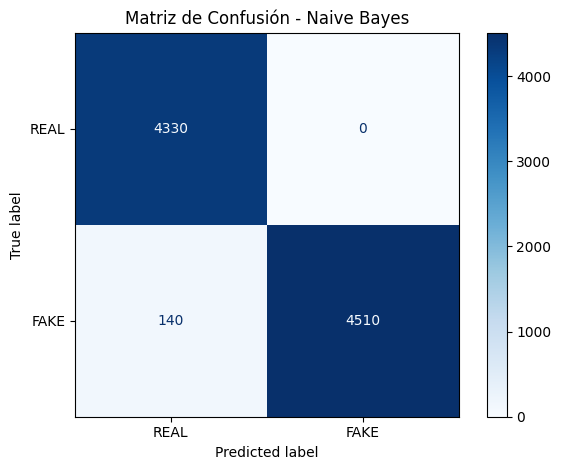


----- Random Forest -----
              precision    recall  f1-score   support

        REAL       1.00      1.00      1.00      4330
        FAKE       1.00      1.00      1.00      4650

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



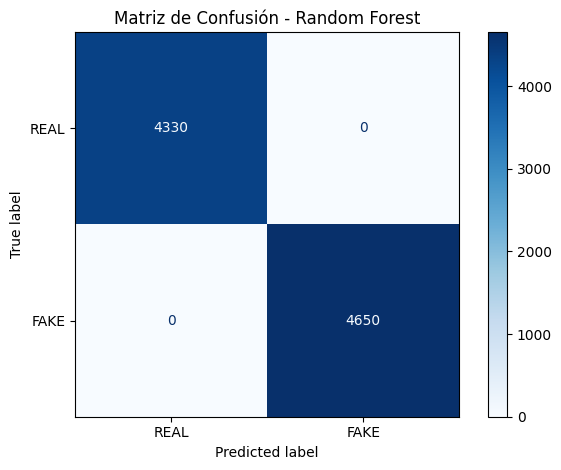

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Creamos un diccionario con los modelos
modelos = {
    'Regresión Logística': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Entrenamos y evaluamos cada modelo
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    pred = modelo.predict(X_test)

    print(f'\n----- {nombre} -----')
    print(classification_report(y_test, pred, target_names=['REAL', 'FAKE']))

    disp = ConfusionMatrixDisplay.from_estimator(
        modelo, X_test, y_test, display_labels=['REAL', 'FAKE'], cmap='Blues'
    )
    disp.ax_.set_title(f'Matriz de Confusión - {nombre}')
    plt.tight_layout()
    plt.show()

### Optimice los parametros de su algoritmo y reporte el F1-score de 20 corridas experimentales con 5 fold cross validation.

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import numpy as np

# Definimos los modelos y sus grids
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear']  # liblinear funciona bien para datasets pequeños
}

param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Resultados acumulados
f1_scores_lr = []
f1_scores_rf = []

# 20 repeticiones
for i in range(20):
    print(f'Iteración {i+1}/20')

    # División nueva
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(
        X, y, test_size=0.2, random_state=i
    )

    # ------------------- Logistic Regression -------------------
    grid_lr = GridSearchCV(LogisticRegression(max_iter=1000),
                           param_grid_lr, cv=5, scoring='f1', n_jobs=-1)
    grid_lr.fit(X_train_i, y_train_i)
    best_lr = grid_lr.best_estimator_

    f1_cv_lr = cross_val_score(best_lr, X_train_i, y_train_i,
                               scoring='f1', cv=5).mean()
    f1_scores_lr.append(f1_cv_lr)

    # ------------------- Random Forest -------------------
    grid_rf = GridSearchCV(RandomForestClassifier(),
                           param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
    grid_rf.fit(X_train_i, y_train_i)
    best_rf = grid_rf.best_estimator_

    f1_cv_rf = cross_val_score(best_rf, X_train_i, y_train_i,
                               scoring='f1', cv=5).mean()
    f1_scores_rf.append(f1_cv_rf)

# ------------------- Resultados -------------------
print("\nResultados promedio de F1-score (20 corridas x 5 folds):")
print(f"Logistic Regression: {np.mean(f1_scores_lr):.4f} ± {np.std(f1_scores_lr):.4f}")
print(f"Random Forest:       {np.mean(f1_scores_rf):.4f} ± {np.std(f1_scores_rf):.4f}")


Iteración 1/20


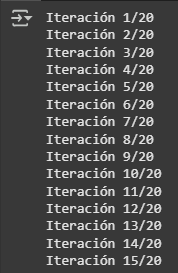

In [ ]:
# ------------------- Resultados -------------------
print("\nResultados promedio de F1-score (20 corridas x 5 folds):")
print(f"Logistic Regression: {np.mean(f1_scores_lr):.4f} ± {np.std(f1_scores_lr):.4f}")
print(f"Random Forest:       {np.mean(f1_scores_rf):.4f} ± {np.std(f1_scores_rf):.4f}")

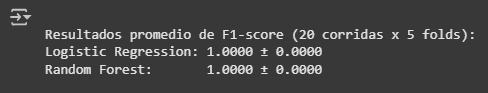

### Explique sus decisiones, genere visualizaciones y conclusiones.

Probamos varios modelos para clasificar noticias como reales o falsas. Naive Bayes tuvo un desempeño más moderado, pero Regresión Logística y Random Forest dieron 100% de accuracy en todas las corridas. Este valor perfecto de accuracy es mala señal: lo más probable es que los modelos estén sobreajustando, es decir, aprendiendo combinaciones de variables que se repiten en los datos, pero que no sirven para generalizar. A pesar de que limpiamos varias columnas que pudieran tener alta relación con el label, puede que todavía haya variables estructurales que estén muy marcadas.

## <font color='blue'>**Set de Datos Tarjetas de Créditos**</font>

Utilizaremos un conjunto de datos real de transacciones anónimas con tarjetas de crédito realizadas por titulares de tarjetas europeos a partir de septiembre de 2013. Estas transacciones están etiquetadas como fraudulentas o genuinas, y el objetivo es crear una solución de detección de fraudes utilizando el aprendizaje automático para predecir las etiquetas correctas para nuevas instancias.
Este conjunto de datos está muy desequilibrado. De las 284.807 transacciones, solo 492 son fraudulentas (0,172%). Este bajo porcentaje de fraude es bastante típico de las transacciones con tarjeta de crédito. Hay 28 variables, todas ellas numéricas, y no hay variables categóricas. Estas variables no son las características originales, sino el resultado de un análisis de componentes principales.

Para lidiar con datasets desbalanceados se recomienda utilizar la libreria imblearn. En ella hay varios metodos para balancear los datos. Existe un método de submuestreo y otro de sobremuestreo (SMOTE).

In [ ]:
# Configuración inicial
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import imblearn
from google.colab import drive
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


drive.mount('/content/drive')
# Utilice dataset credit_card.txt
url='/content/drive/MyDrive/DATA SCIENCE UDD 2024/MODULO 6/credit_card.txt'
cc_df = pd.read_csv(url, sep=',')
cc_df.head()

# preprocesamiento
X = cc_df.drop('Class', axis=1)
y = cc_df['Class']

# división estratificada para mantener proporción de fraudes
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# pipeline de procesamiento
base_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('oversample', SMOTE(sampling_strategy=0.1, random_state=42)),
    ('undersample', RandomUnderSampler(sampling_strategy=0.5, random_state=42)),
    ('model', XGBClassifier(
        scale_pos_weight=15,
        eval_metric='aucpr',
        random_state=77
    ))
])

# espacio de búsqueda de hiperparámetros
param_dist = {
    'model__max_depth': [7, 9, 10, 12],
    'model__learning_rate': [0.1, 0.2, 0.3, 0.5],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.3, 0.6, 0.8],
    'model__gamma': [0, 0.1, 0.3],
    'model__reg_alpha': [0, 0.1, 1],
    'model__n_estimators': [ 300, 500, 1000]
}

# Búsqueda aleatoria
search = RandomizedSearchCV(
    estimator=base_pipeline,
    param_distributions=param_dist,
    n_iter=10,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    random_state=42
)

# Entrenamiento con optimización
search.fit(X_train, y_train)

# ============ EVALUACIÓN ============
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

print("Mejores hiperparámetros:")
print(search.best_params_)
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print(f"\nROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")



Mounted at /content/drive
Mejores hiperparámetros:
{'model__subsample': 0.8, 'model__reg_alpha': 0, 'model__n_estimators': 500, 'model__max_depth': 10, 'model__learning_rate': 0.1, 'model__gamma': 0.1, 'model__colsample_bytree': 0.3}

Matriz de confusión:
[[56782    82]
 [   10    88]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.52      0.90      0.66        98

    accuracy                           1.00     56962
   macro avg       0.76      0.95      0.83     56962
weighted avg       1.00      1.00      1.00     56962


ROC-AUC: 0.9819


In [ ]:
# ENTRENAMIENTO DE 2 MODELOS ADICIONALES

# pipeline para preprocesamiento de entrenamiento
pipeline_preprocessing_train = Pipeline([
    ('scaler', RobustScaler()),
    ('oversample', SMOTE(sampling_strategy=0.1, random_state=42)),
    ('undersample', RandomUnderSampler(sampling_strategy=0.5, random_state=42))
])

# Preprocesar los datos de entrenamiento
X_train_preprocessed, y_train_preprocessed = pipeline_preprocessing_train.fit_resample(X_train, y_train)

#pipeline solo para escalado de datos de prueba
pipeline_scaling_test = Pipeline([
    ('scaler', RobustScaler())
])

# Escalar los datos de prueba
X_test_scaled = pipeline_scaling_test.fit_transform(X_test)

# Modelo 1: GaussianNB
print("\n=== Modelo: GaussianNB ===")
gnb = GaussianNB()
gnb.fit(X_train_preprocessed, y_train_preprocessed)
y_pred_gnb = gnb.predict(X_test_scaled)
y_proba_gnb = gnb.predict_proba(X_test_scaled)[:, 1]

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_gnb))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_gnb))
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_gnb):.4f}")

# Modelo 2: Regresión Logística
print("\n=== Modelo: Regresión Logística ===")
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg.fit(X_train_preprocessed, y_train_preprocessed)
y_pred_logreg = logreg.predict(X_test_scaled)
y_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_logreg))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_logreg))
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_logreg):.4f}")



=== Modelo: GaussianNB ===
Matriz de confusión:
[[55389  1475]
 [   12    86]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.88      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.97      0.99     56962

ROC-AUC: 0.9648

=== Modelo: Regresión Logística ===
Matriz de confusión:
[[55413  1451]
 [    8    90]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

ROC-AUC: 0.9705


In [ ]:
# Comparación con el modelo XGBoost
print("\n=== Comparación con XGBoost ===")
best_model = search.best_estimator_
y_pred_xgb = best_model.predict(X_test)
y_proba_xgb = best_model.predict_proba(X_test)[:, 1]

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_xgb))
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_xgb):.4f}")


=== Comparación con XGBoost ===
Matriz de confusión:
[[56782    82]
 [   10    88]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.52      0.90      0.66        98

    accuracy                           1.00     56962
   macro avg       0.76      0.95      0.83     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9819


Dado su enfoque basado en árboles de decisión y boosting, se evidencia que XGBoost es el mejor modelo en términos de ROC-AUC y F1-score debido a su capacidad para manejar relaciones no lineales y datos desbalanceados.